In [1]:
include("src/CrossSection.jl")
using .CrossSection

---
#### Photon vector meson wavefunction overlap
The expressions are taken from [arXiv:hep-ph/0606272](https://arxiv.org/abs/hep-ph/0606272)
$$\begin{aligned}(\Psi^*_V\Psi)_T&=\hat{e}_f e\dfrac{N_c}{\pi z(1-z)}\left\{m_f^2 K_0(\epsilon r)\phi_T(r,z)-[z^2+(1-z)^2]\epsilon K_1(\epsilon r)\partial_r \phi_T(r,z)\right\}\\
(\Psi^*_V\Psi)_L&=\hat{e}_f e\dfrac{N_c}{\pi}2Qz(1-z)K_0(\epsilon r)\left[M_V\phi_L(r,z)+\delta \dfrac{m_f^2-\nabla_r^2}{M_vz(1-z)}\phi_L(r,z)\right]
\end{aligned}$$

##### Boosted Gaussian model
$$\phi_{T,L}(r,z)=\mathcal{N}_{T,L}z(1-z)\exp\left(-\dfrac{m_f^2\mathcal{R}^2}{8z(1-z)}-\dfrac{2z(1-z)r^2}{\mathcal{R}^2}+\dfrac{m_f^2\mathcal{R}^2}{2}\right)$$

The parameters $\mathcal{N}_{T,L}$ and $\mathcal{R}$ are determined from the normalization and decay width conditions. 

In [2]:
ϕ(r, z, "T", params_wavefct)

0.578z*(1 - z)*exp(2.2539999999999996 + -4.507999999999999 / (8z*(1 - z)) - 0.8695652173913044(r^2)*z*(1 - z))

In [3]:
ϕ(r, z, "L", params_wavefct)

0.575z*(1 - z)*exp(2.2539999999999996 + -4.507999999999999 / (8z*(1 - z)) - 0.8695652173913044(r^2)*z*(1 - z))

In [4]:
ΨᵥΨ(r, z, "T", params_wavefct)

(0.5784236293296671(1.1328799999999997z*(1 - z)*SpecialFunctions.besselk(0, 1.4r)*exp(2.2539999999999996 + -4.507999999999999 / (8z*(1 - z)) - 0.8695652173913044(r^2)*z*(1 - z)) - 1.407304347826087r*(z^2)*(-(z^2) - ((1 - z)^2))*((1 - z)^2)*exp(2.2539999999999996 + -4.507999999999999 / (8z*(1 - z)) - 0.8695652173913044(r^2)*z*(1 - z))*SpecialFunctions.besselk(1, 1.4r))) / (z*(1 - z))

In [5]:
ΨᵥΨ(r, z, "L", params_wavefct)

0.0

---

#### GBW dipole cross section

$$\sigma_{q\overline{q}}^\mathrm{GBW}(x,r)=\sigma_0 \left(1-\mathrm{e}^{-r^2 Q_s^2(x)/4}\right)$$

where $Q_s^2(x)=(x_0/x)^{\lambda_{\mathrm{GBW}}}$.

Let us introduce an impact parameter dependence 

$$\dfrac{\mathrm{d}\sigma_{q\overline{q}}}{\mathrm{d}^2\boldsymbol{b}}=\sigma_0\left(1-\mathrm{e}^{-\mathcal{N}r^2 Q_s^2(x,b)}\right)$$

where $Q_s^2(x,b)=(x_0/x)^{\lambda_{\mathrm{GBW}}}T(b)$ with a Gaussian thickness function

$$T(b)=\dfrac{1}{2\pi B_p}\mathrm{e}^{-\frac{b^2}{2B_p}}$$

Here the parameter $B_p$ is the proton width. Here $\mathcal{N}$ is a normalization factor chosen to fit $\mathrm{d}\sigma/\mathrm{d}t$.

In [6]:
Qₛ(params_gbw)

0.5915964371087449

In [7]:
T(b, params_gbw)

0.039788735772973836exp((-1//8)*(b^2))

In [8]:
gbwdipole(r, b, params_gbw)

74.47751(1 - exp(-0.17406892726838896(r^2)*exp((-1//8)*(b^2))))

---
#### Coherent cross section
Coherent diffraction cross section

$$\dfrac{\mathrm{d}\sigma^{\gamma^*p\rightarrow Vp}_\mathrm{c}}{\mathrm{d}t}=\dfrac{1}{16\pi}\left|\langle\mathcal{A}_{T,L}^{\gamma^*p\rightarrow Vp}(x_{\mathbb{P}}, Q^2, \boldsymbol{\Delta})\rangle\right|^2$$

Assuming angle independence of the cross section and wavefunctions, the scattering amplitude simplifies to

$$\begin{aligned}\mathcal{A}_{T,L}^{\gamma^*p\rightarrow Vp}(x_{\mathbb{P}}, Q^2, \boldsymbol{\Delta})=&\mathrm{i}\pi\int\limits_{r_\mathrm{min}}^{r_\mathrm{max}} r\,\mathrm{d} r\int_{b_\mathrm{min}}^{b_\mathrm{max}} b \,\mathrm{d} b \int_0^1\mathrm{d}z\, (\Psi^*\Psi_V)_{T,L}(Q^2, r,z)\\ &\times \dfrac{\mathrm{d}\sigma^p_{\mathrm{dip}}}{\mathrm{d}^2 \boldsymbol{b}}(b, r, x_{\mathbb{P}})J_0(b\Delta)J_0((1-z)r\Delta)\end{aligned}$$
where we used $\int_0^{2\pi}d\theta e^{-i a \cos\theta}=2\pi J_0(a)$, with $J_0$ the Bessel function of first kind.

In [9]:
Agbw(r, b, z, Δ, params_wavefct, params_gbw)

(43.07955163763657b*r*(1.1328799999999997z*(1 - z)*SpecialFunctions.besselk(0, 1.4r)*exp(2.2539999999999996 + -4.507999999999999 / (8z*(1 - z)) - 0.8695652173913044(r^2)*z*(1 - z)) - 1.407304347826087r*(z^2)*(-(z^2) - ((1 - z)^2))*((1 - z)^2)*exp(2.2539999999999996 + -4.507999999999999 / (8z*(1 - z)) - 0.8695652173913044(r^2)*z*(1 - z))*SpecialFunctions.besselk(1, 1.4r))*SpecialFunctions.besselj(0, b*Δ)*SpecialFunctions.besselj(0, r*(1 - z)*Δ)*(1 - exp(-0.17406892726838896(r^2)*exp((-1//8)*(b^2))))) / (z*(1 - z))

In [2]:
t_range, dσdt, dσdt_err = diffractive(diff_mode, dipole_mode, params_wavefct, params_gbw, params_mc)

Total iterations * blocks 160: 100%|██████| Time: 0:00:07 (46.89 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:06 (38.77 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:06 (40.01 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:06 (41.68 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:06 (41.90 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:06 (42.09 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:06 (42.47 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:06 (42.45 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:06 (42.93 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:06 (42.57 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:06 (43.19 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:06 (43.36 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:06 (43.30 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:06 (43.54

([0.0, 0.00510204081632653, 0.02040816326530612, 0.04591836734693877, 0.08163265306122448, 0.12755102040816327, 0.18367346938775508, 0.25, 0.32653061224489793, 0.41326530612244905, 0.5102040816326531, 0.6173469387755102, 0.7346938775510203, 0.8622448979591837, 1.0], [275.0445731168973, 268.6847440364326, 253.46075129969967, 222.92369696338488, 189.242365993737, 153.0383553556742, 115.85921607892878, 85.51380210672653, 60.40100537154887, 39.64149124236761, 24.80506867339618, 14.986330748387912, 8.482492867667014, 4.480787364845021, 2.329705245355531], [1.1983010623470223, 1.2877913395627505, 1.1332836716134724, 0.9028753189597198, 0.9317477210853724, 0.7572365312144681, 0.6795304350560799, 0.3729349562247631, 0.34960978989981656, 0.21816636495139766, 0.14746577514249096, 0.11195810809965184, 0.08231259611616311, 0.055628537645885115, 0.03719641270715701])

---
#### Plot coherent cross section in GBW model

In [3]:
using Plots
using LaTeXStrings

In [4]:
file_path = "jpsi_coh_hera.txt"
lines = readlines(file_path)

tcent_hera, dσcoh_hera, Δtot_hera = Float64[], Float64[], Float64[], Float64[], Float64[]

for line in lines
    
    if startswith(line, "#") || isempty(line)
        continue
    end

    columns = split(line)

    push!(tcent_hera, parse(Float64, columns[4]))
    push!(dσcoh_hera, parse(Float64, columns[5]))
    push!(Δtot_hera, parse(Float64, columns[6]))
end

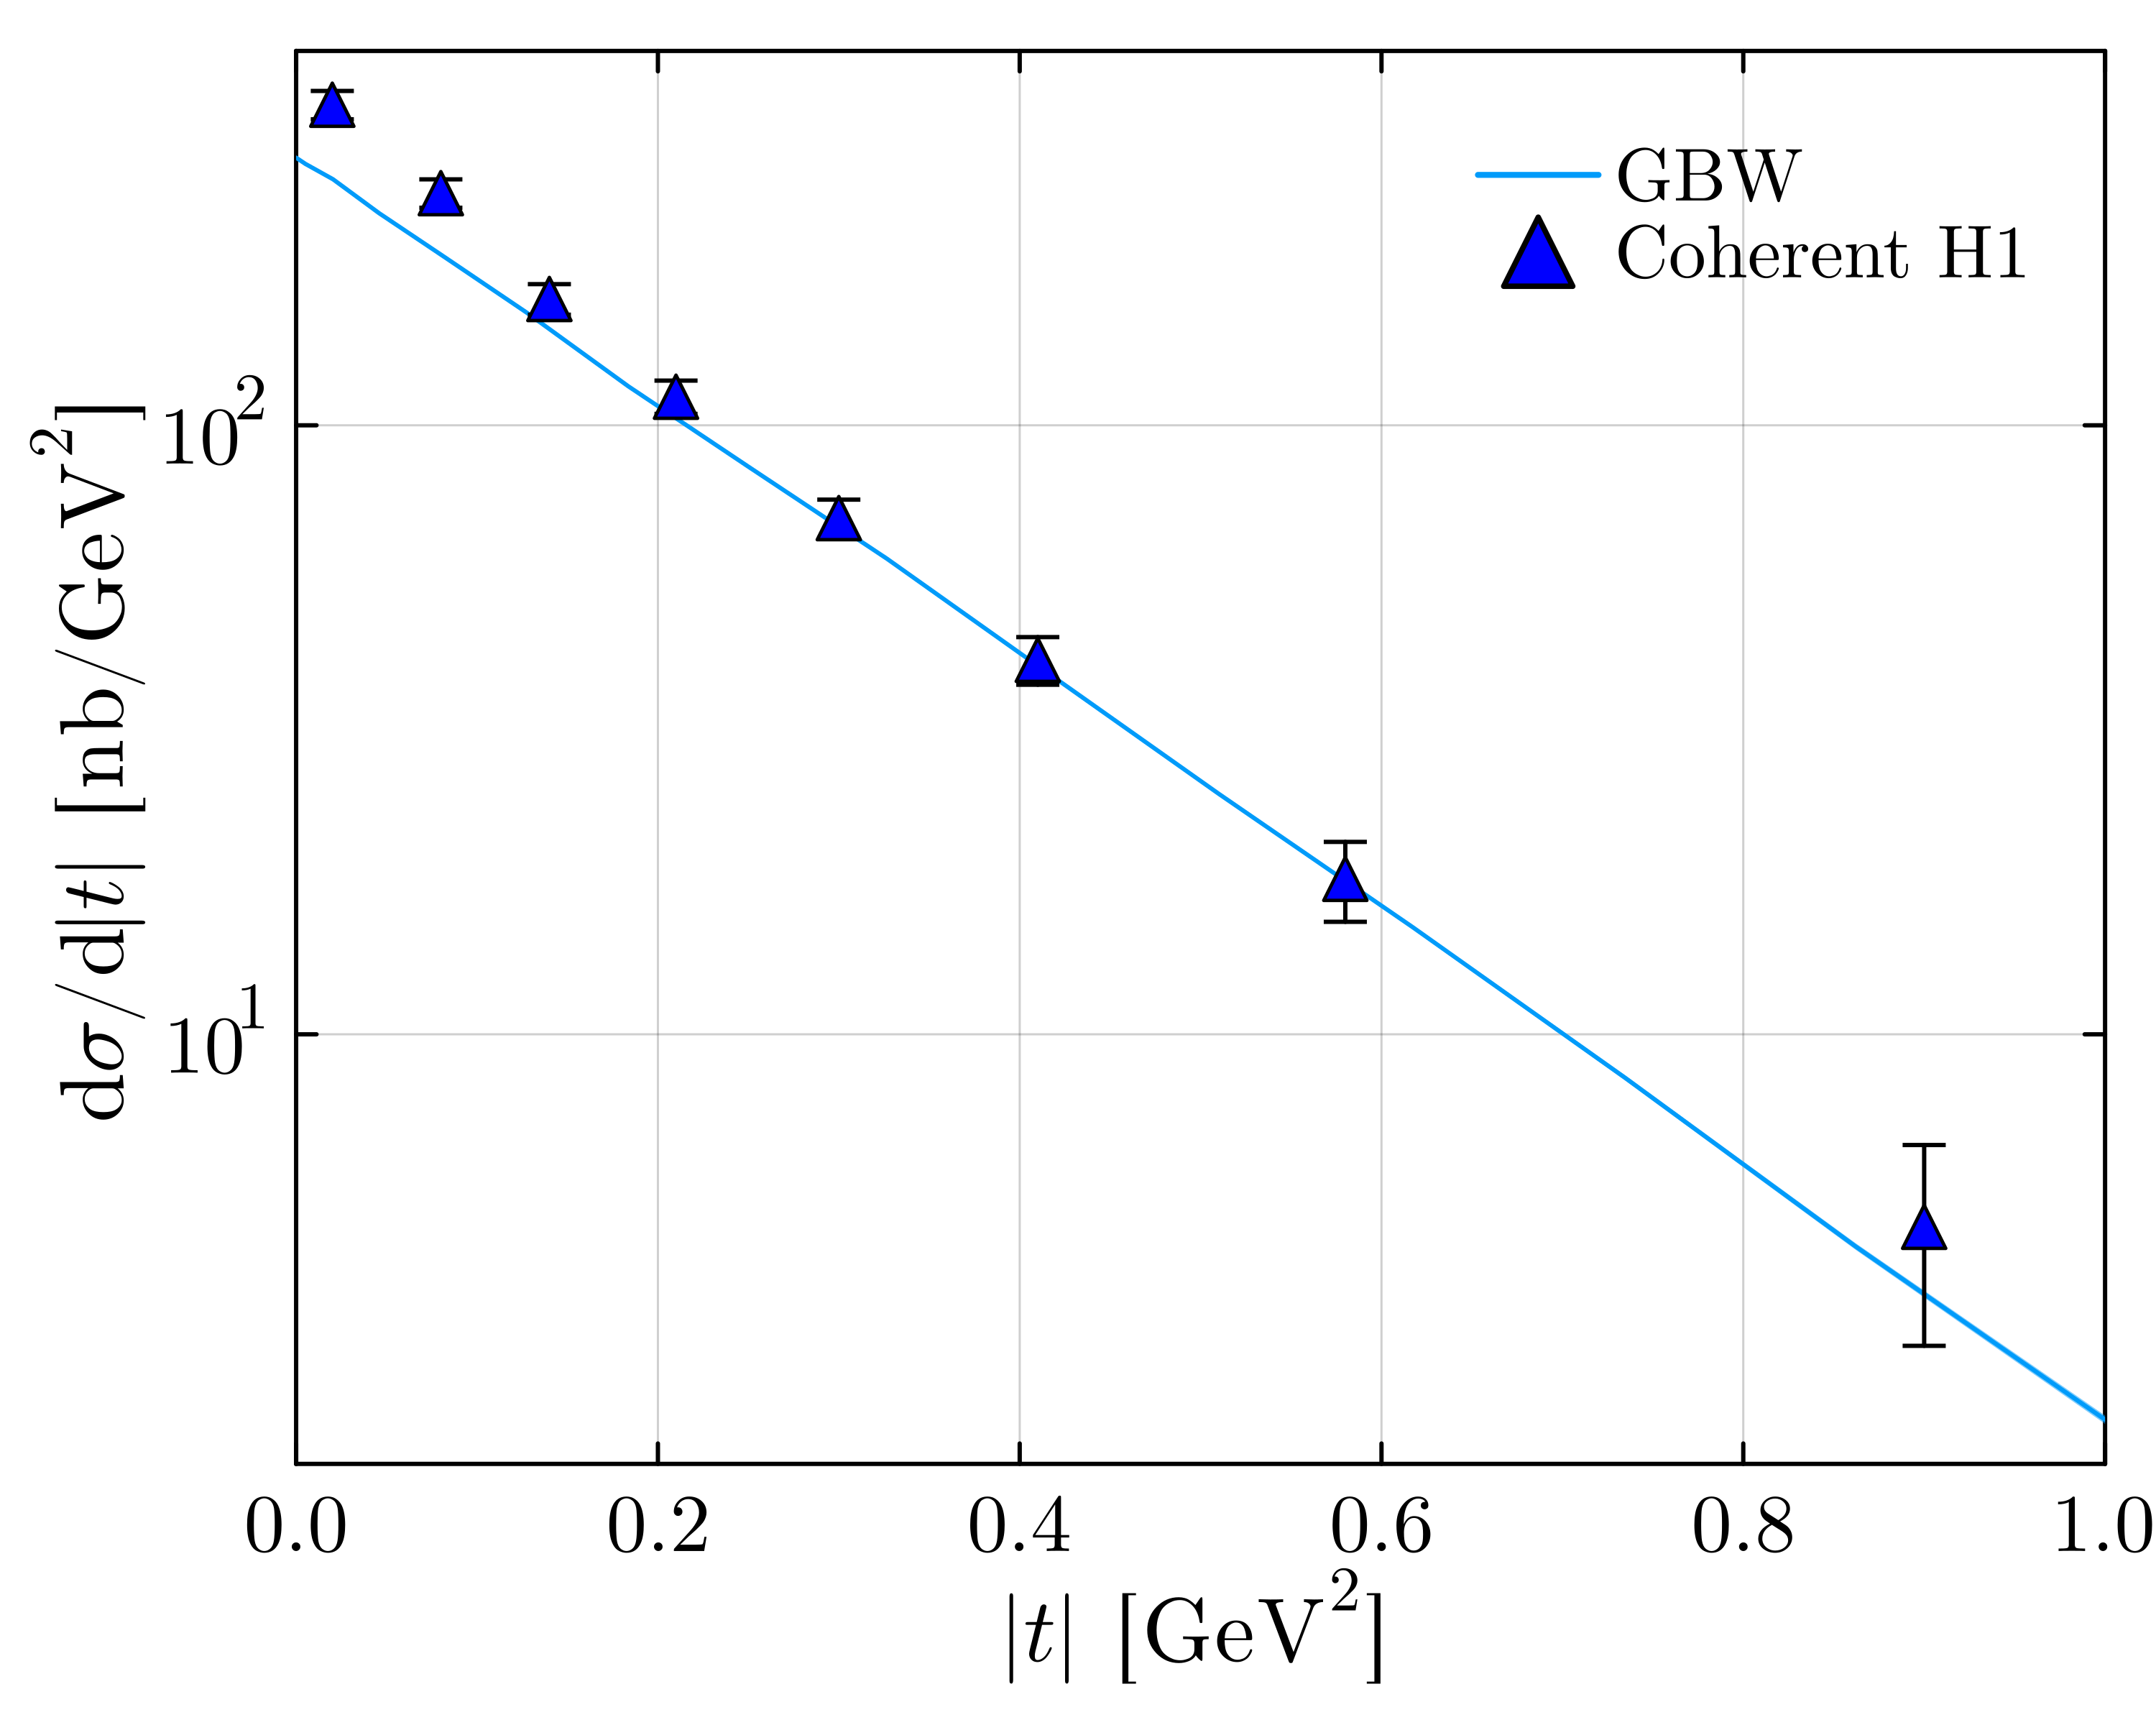

In [5]:
default(fontfamily="Computer Modern", framestyle=:box, legendfontsize=11, labelfontsize=14, tickfontsize=12, size=(500,400), foreground_color_legend = nothing, background_color_legend=nothing)

plot(t_range, dσdt, yscale=:log10, yticks = :auto, minor_ticks = true, label="GBW", dpi=600, ribbon=dσdt_err)

scatter!(tcent_hera, dσcoh_hera, yerr=Δtot_hera, label="Coherent H1", color=:blue, marker=:utriangle, markersize=5, legend_marker_scale = 0.1)

xlabel!(L"|t|\;[\mathrm{GeV}^2]")
ylabel!(L"\mathrm{d}\sigma/\mathrm{d}|t|\;[\mathrm{nb}/\mathrm{GeV}^2]")

xlims!(0, 1.0)